In [1]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('floats.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [4]:
# Let's set up a problem: Can we predict 'callSign' using these three features: 'Depth', 'Temperature', 'Salinity' ?

print('Reading list of problem variables X and Y...')
X_name = [ 'Depth', 'Temperature', 'Salinity' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'callSign'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [5]:
# Chose the formative scoring method

print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [6]:
# Chose the Algorithms

seed = 42 # setting the seed allows for repeatability

print('Reading list of algorithms to train ...')
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight=None, solver='lbfgs', max_iter=250)))
models.append(('Ridge', RidgeClassifier(alpha=10)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)))
print('done \n')

Reading list of algorithms to train ...
done 



In [7]:
# Split-out test dataset

# We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

# Train, test split
print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_size = 0.20   # means 20 percent

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
print('done \n')

Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



In [8]:
# Now it is time to train some models on the data and estimate their accuracy on unseen data.

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n')

 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model on each split


C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

algorithm LR accuracy results: mean = 0.323229 (std = 0.002447)
 ++ NOW WORKING ON ALGORITHM Ridge ++
Splitting data into 5 folds
Training model on each split
algorithm Ridge accuracy results: mean = 0.335205 (std = 0.005080)
 ++ NOW WORKING ON ALGORITHM kNN ++
Splitting data into 5 folds
Training model on each split
algorithm kNN accuracy results: mean = 0.442116 (std = 0.006673)
done 



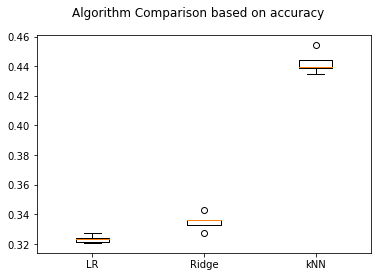

In [9]:
# Compare Algorithms
fig = pl.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier() 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


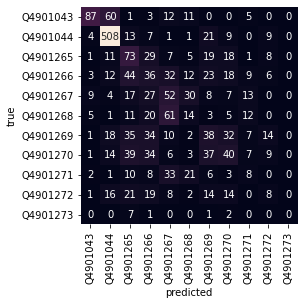


 clasification report:
               precision    recall  f1-score   support

    Q4901043       0.76      0.49      0.59       179
    Q4901044       0.79      0.89      0.83       573
    Q4901265       0.27      0.42      0.33       172
    Q4901266       0.17      0.18      0.17       195
    Q4901267       0.23      0.31      0.27       167
    Q4901268       0.14      0.11      0.12       132
    Q4901269       0.22      0.20      0.21       191
    Q4901270       0.27      0.21      0.24       190
    Q4901271       0.13      0.09      0.10        92
    Q4901272       0.15      0.08      0.10       103
    Q4901273       0.00      0.00      0.00        11

    accuracy                           0.43      2005
   macro avg       0.28      0.27      0.27      2005
weighted avg       0.42      0.43      0.42      2005

Cohen Kappa Score: 0.33081625787957236


done 



C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Make predictions on validation dataset
selected_model = KNeighborsClassifier()
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

In [11]:
# We can do a similar process to chose between different hyperparameters for a model

parameters = {'n_neighbors':[3, 4, 5, 6, 7]}
clf = GridSearchCV(selected_model, parameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('\n')

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full test set.")
print('\n')
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

Best parameters set found on development set:
{'n_neighbors': 6}
Grid scores on development set:
0.444 (+/-0.018) for {'n_neighbors': 3}
0.439 (+/-0.016) for {'n_neighbors': 4}
0.445 (+/-0.016) for {'n_neighbors': 5}
0.445 (+/-0.014) for {'n_neighbors': 6}
0.438 (+/-0.009) for {'n_neighbors': 7}


Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full test set.


              precision    recall  f1-score   support

    Q4901043       0.80      0.49      0.60       179
    Q4901044       0.79      0.89      0.84       573
    Q4901265       0.27      0.43      0.33       172
    Q4901266       0.15      0.19      0.17       195
    Q4901267       0.23      0.31      0.26       167
    Q4901268       0.14      0.11      0.12       132
    Q4901269       0.23      0.20      0.22       191
    Q4901270       0.29      0.23      0.25       190
    Q4901271       0.20      0.11      0.14        92
    Q4901272       0.16      0

C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
